In [1]:
# !pip install datalad
# !apt update
# !apt install -y git-annex

# !git config --global user.name "student"
# !git config --global user.email "student@example.com"
# !datalad install https://github.com/conpdatasets/mica-mics

!pip install nibabel
!pip install scipy
!pip install nilearn

!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 42.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 23.0 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.4.0
    Uninstalling typing_extensions-4.4.0:
      Successfully uninstalled typing_extensions-4.4.0

[notice] A new release of pip is available: 23.3.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 89.1 MB/s eta 0:00:00:00:0100:01

[notice] A new release of pip is available: 23.3.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 104.3 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.

In [2]:
!datalad get -J 6 .

[ERROR  ] NoDatasetFound(No dataset found at '/workspace' for the purpose "get content of ['.']".  Specify a dataset to work with by providing its path via the `dataset` option, or change the current working directory to be in a dataset.) (NoDatasetFound) 
usage: datalad get [-h] [-s LABEL] [-d PATH] [-r] [-R LEVELS] [-n]
                   [-D DESCRIPTION] [--reckless [auto|ephemeral|shared-...]]
                   [-J NJOBS] [--version]
                   [PATH ...]


In [13]:
import matplotlib.pyplot as plt

def show_t1_slices(volume, axis=2, step=10): #show images
    num_slices = volume.shape[axis]
    slice_indices = list(range(0, num_slices, step))
    n = len(slice_indices)

    fig, axes = plt.subplots(1, n, figsize=(3*n, 3))
    if n == 1:
        axes = [axes]

    for ax, idx in zip(axes, slice_indices):
        if axis == 0:
            slice_img = volume[idx,:,:]
        elif axis == 1:
            slice_img = volume[:,idx,:]
        else:
            slice_img = volume[:,:,idx]
        ax.imshow(slice_img.T, cmap='gray', origin='lower')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

show_t1_slices(t1_tensor, axis=2, step=1)

NameError: name 't1_tensor' is not defined

In [26]:
# from matplotlib.animation import FuncAnimation

# # Load 4D fMRI data
# fmri_img = nib.load(fmri_path)
# fmri_data = fmri_img.get_fdata()  #shape: (x, y, z, t)

# # Pick an axial slice (z-plane)
# z = fmri_data.shape[2] // 2
# timepoints = fmri_data.shape[3]

# # Plot setup
# fig, ax = plt.subplots(figsize=(5, 5))
# img = ax.imshow(fmri_data[:,:,z,0].T, cmap='gray', origin='lower', aspect='auto')
# ax.axis('off')

# # Animation update
# def update(i):
#     img.set_data(fmri_data[:, :, z, i].T)
#     ax.set_title(f"Timepoint {i}")
#     return [img]

# ani = FuncAnimation(fig, update, frames=range(timepoints), interval=100, blit=True)
# ani.save("fmri_animation.gif", writer="pillow", fps=10)


<IPython.core.display.Javascript object>

PREPROCESSING

In [2]:
import nibabel as nib
import numpy as np
from scipy.ndimage import zoom

def load_and_preprocess_t1(path, target_shape=(128,128,128)):
    img = nib.load(path)
    data = img.get_fdata()
    
    data = (data - np.mean(data)) / np.std(data) #Normalise intensity

    zoom_factors = np.array(target_shape) / np.array(data.shape) #Resize to target shape
    data_resized = zoom(data, zoom=zoom_factors, order=1)

    return data_resized.astype(np.float32)  #(128,128,128)

from nilearn import datasets, input_data, image

#converts raw fMRI(4D) into ROI-wise time series (2D) using AAL Atlas

#Load AAL parcellation
atlas = datasets.fetch_atlas_aal()
masker = input_data.NiftiLabelsMasker(
    labels_img=atlas.maps,
    standardize=True,
    t_r=0.6,  #found in json file
    resampling_target='labels'
)

def extract_fmri_timeseries(fmri_path):
    fmri_img = image.load_img(fmri_path)
    timeseries = masker.fit_transform(fmri_img)  #(timepoints,regions)
    return timeseries.astype(np.float32)

/tmp/ipykernel_83/3832418139.py:16: DeprecationWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  from nilearn import datasets, input_data, image
/tmp/ipykernel_83/3832418139.py:21: DeprecationWarning: Starting in version 0.13, the default fetched mask will beAAL 3v2 instead.
  atlas = datasets.fetch_atlas_aal()


[fetch_atlas_aal] Added README.md to /root/nilearn_data
[fetch_atlas_aal] Dataset created in /root/nilearn_data/aal_SPM12
[fetch_atlas_aal] Downloading data from https://www.gin.cnrs.fr/AAL_files/aal_for_SPM12.tar.gz ...
[fetch_atlas_aal]  ...done. (2 seconds, 0 min)

[fetch_atlas_aal] Extracting data from /root/nilearn_data/aal_SPM12/5d72fe1c9daf02b658cbf1f7e7026e0f/aal_for_SPM12.tar.gz...
[fetch_atlas_aal] .. done.



In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.cuda.amp import GradScaler, autocast
from torch.optim import AdamW
from torch.optim.lr_scheduler import CosineAnnealingLR

In [4]:
import os
import numpy as np
import torch
from torch.utils.data import DataLoader

root_dir  = "/workspace/mica-mics/MICs_release/rawdata"
cache_dir = "/workspace/mica-mics/cache_fmri_ts"

train_ids = [f"HC{str(i).zfill(3)}" for i in range(1, 41)]
val_ids   = [f"HC{str(i).zfill(3)}" for i in range(41, 46)]
test_ids  = [f"HC{str(i).zfill(3)}" for i in range(46, 51)]

os.makedirs(cache_dir, exist_ok=True)

for sid in train_ids + val_ids + test_ids:
    out_path = os.path.join(cache_dir, f"{sid}_fmri_ts.npy")
    if os.path.exists(out_path):
        # print(f"{sid}: already cached")
        continue

    fmri_path = os.path.join(root_dir, f"sub-{sid}/ses-01/func/sub-{sid}_ses-01_task-rest_acq-AP_bold.nii.gz")
    ts = extract_fmri_timeseries(fmri_path)
    np.save(out_path, ts)
    print(f"{sid}: saved → {out_path}")

class MICsDataset(torch.utils.data.Dataset):
    def __init__(self, subject_ids, root_dir, cache_dir):
        self.subject_ids = subject_ids
        self.root_dir    = root_dir
        self.cache_dir   = cache_dir

    def __len__(self):
        return len(self.subject_ids)

    def __getitem__(self, idx):
        sid = self.subject_ids[idx]

        t1_path   = os.path.join(self.root_dir, f"sub-{sid}/ses-01/anat/sub-{sid}_ses-01_run-1_T1w.nii.gz")
        t1_arr    = load_and_preprocess_t1(t1_path)       # (128,128,128)
        t1_tensor = torch.from_numpy(t1_arr).unsqueeze(0) # (1,128,128,128)

        npy_path    = os.path.join(self.cache_dir, f"{sid}_fmri_ts.npy")
        fmri_arr    = np.load(npy_path)                   # (T,116)
        fixed_T = 800
        orig_T = fmri_arr.shape[0]
        
        if orig_T >= fixed_T:
            fmri_arr = fmri_arr[:fixed_T]
        else:
            pad = np.zeros((fixed_T - orig_T, fmri_arr.shape[1]), dtype=np.float32)
            fmri_arr = np.concatenate([fmri_arr, pad], axis=0)

        fmri_tensor = torch.from_numpy(fmri_arr)  # (800, 116)

        return t1_tensor, fmri_tensor

train_dataset = MICsDataset(train_ids, root_dir, cache_dir)
val_dataset   = MICsDataset(val_ids, root_dir, cache_dir)
test_dataset  = MICsDataset(test_ids, root_dir, cache_dir)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True,  num_workers=4, pin_memory=True)
val_loader   = DataLoader(val_dataset,   batch_size=len(val_dataset), shuffle=False, num_workers=4, pin_memory=True)
test_loader  = DataLoader(test_dataset,  batch_size=32, shuffle=False, num_workers=4, pin_memory=True)


MODEL DEFINITIONS

In [7]:
class GEGLU(nn.Module):
    def __init__(self, dim, hidden_dim):
        super().__init__()
        self.proj = nn.Linear(dim, hidden_dim * 2)
    def forward(self, x):
        x, gate = self.proj(x).chunk(2, dim=-1)
        return F.gelu(gate) * x

class PreNormTransformerLayer(nn.Module):
    def __init__(self, dim, heads, dropout=0.0):
        super().__init__()
        self.norm1 = nn.LayerNorm(dim)
        self.attn  = nn.MultiheadAttention(dim, heads, dropout=dropout, batch_first=True)
        self.norm2 = nn.LayerNorm(dim)
        self.mlp   = nn.Sequential(
            GEGLU(dim, dim*2),
            nn.Dropout(dropout),
            nn.Linear(dim*2, dim),
            nn.Dropout(dropout),
        )
    def forward(self, x):
        a = self.attn(self.norm1(x), self.norm1(x), self.norm1(x))[0]
        # x = x + F.dropout(a, p=0.1, training=self.training)
        x = x + a
        m = self.mlp(self.norm2(x))
        # return x + F.dropout(m, p=0.1, training=self.training)
        return x + m

class PatchEmbed3D(nn.Module):
    def __init__(self, img_size=128, patch_size=16, in_ch=1, embed_dim=512):
        super().__init__()
        assert img_size % patch_size == 0
        self.proj = nn.Conv3d(in_ch, embed_dim, kernel_size=patch_size, stride=patch_size)
        self.norm = nn.LayerNorm(embed_dim)
    def forward(self, x):
        x = self.proj(x)                       # (B, C, D', H', W')
        x = x.flatten(2).transpose(1,2)        # (B, N, C)
        return self.norm(x)

class ViT3D(nn.Module):
    def __init__(self, img_size=128, patch_size=16, in_ch=1,
                 embed_dim=512, depth=8, heads=16):
        super().__init__()
        n_patches = (img_size//patch_size)**3
        self.patch = PatchEmbed3D(img_size, patch_size, in_ch, embed_dim)
        self.cls   = nn.Parameter(torch.zeros(1,1,embed_dim))
        self.pos   = nn.Parameter(torch.zeros(1, n_patches+1, embed_dim))
        layers = [PreNormTransformerLayer(embed_dim, heads) for _ in range(depth)]
        self.enc   = nn.Sequential(*layers)
        self.norm  = nn.LayerNorm(embed_dim)
    def forward(self, x):
        B = x.size(0)
        x = self.patch(x)
        cls = self.cls.expand(B,-1,-1)
        x = torch.cat([cls, x], dim=1) + self.pos
        x = self.enc(x)
        return self.norm(x[:,0])

class TimeSeriesTransformer(nn.Module):
    def __init__(self, num_rois=116, embed_dim=512,
                 depth=8, heads=8, dropout=0.0, max_len=800):
        super().__init__()
        self.proj = nn.Linear(num_rois, embed_dim)
        self.pos  = nn.Parameter(torch.zeros(1, max_len, embed_dim))
        layer = nn.TransformerEncoderLayer(
            d_model=embed_dim, nhead=heads,
            dim_feedforward=embed_dim*4, dropout=dropout,
            batch_first=True
        )
        self.enc  = nn.TransformerEncoder(layer, num_layers=depth)
        self.norm = nn.LayerNorm(embed_dim)
    def forward(self, x):
        x = self.proj(x)                  # (B, T, D)
        x = x + self.pos[:, :x.size(1)]   # add temporal pos
        x = self.enc(x)
        return self.norm(x.mean(1))       # pool

class ContrastiveModel(nn.Module):
    def __init__(self, t1_enc, fmri_enc, latent_dim=512, temp=0.05):
        super().__init__()
        self.t1, self.fmri = t1_enc, fmri_enc
        D = t1_enc.norm.normalized_shape[0]
        # two‐layer MLP heads
        self.proj1 = nn.Sequential(
            nn.Linear(D, D), nn.GELU(),
            nn.Linear(D, latent_dim)
        )
        self.proj2 = nn.Sequential(
            nn.Linear(D, D), nn.GELU(),
            nn.Linear(D, latent_dim)
        )
        self.temp = temp

    def forward(self, v1, v2):
        h1 = F.normalize(self.proj1(self.t1(v1)), dim=1)
        h2 = F.normalize(self.proj2(self.fmri(v2)), dim=1)
        print(f"DEBUG h1.shape: {h1.shape}, h2.shape: {h2.shape}")  #(32,512) if B=32
        logits = h1 @ h2.t() / self.temp
        print(f"DEBUG logits.shape: {logits.shape}")
        labels = torch.arange(h1.size(0), device=logits.device)
        info_nce = 0.5 * (F.cross_entropy(logits, labels)
                         + F.cross_entropy(logits.t(), labels))
        return info_nce, h1, h2

def train_full(model, train_loader, val_loader, epochs=50):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model  = model.to(device)
    opt    = AdamW(model.parameters(), lr=5e-4, weight_decay=1e-2)
    sched  = CosineAnnealingLR(opt, T_max=epochs)
    best, wait = -1, 0

    for ep in range(1, epochs+1):
        #training
        model.train()
        tloss = 0
        for x1, x2 in train_loader:
            if ep == 1 and len(train_loader) > 0:
                print(f"DEBUG x1.shape: {x1.shape}, x2.shape: {x2.shape}")  #should be (32,1,128,128,128), (32,800,116) for B=32
            x1, x2 = x1.to(device), x2.to(device)
            opt.zero_grad()
            loss, _, _ = model(x1, x2)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            opt.step()
            tloss += loss.item()
        tloss /= len(train_loader)

        #validation 
        model.eval()
        vcos, vloss = 0, 0
        with torch.no_grad():
            for x1, x2 in val_loader:
                x1, x2 = x1.to(device), x2.to(device)
                loss, h1, h2 = model(x1, x2)
                vloss += loss.item()
                vcos  += F.cosine_similarity(h1, h2, dim=1).mean().item()
            vloss /= len(val_loader)
            vcos  /= len(val_loader)

        print(f"[{ep:02d}] Train L={tloss:.3f} Val L={vloss:.3f} Val Cos={vcos:.3f}")
        sched.step()

        #early stop on cosine plateau
        if vcos > best:
            best, wait = vcos, 0
            torch.save(model.state_dict(), "best.pt")
        else:
            wait += 1
            if wait >= 100:
                print("Early stopping.")
                break


In [8]:
#build the model
model = ContrastiveModel(
    t1_enc=ViT3D(),
    fmri_enc=TimeSeriesTransformer(),
    latent_dim=512,
    temp=0.05
)

for p in model.t1.parameters():   p.requires_grad = True
for p in model.fmri.parameters(): p.requires_grad = True

#train
# collapse_v_means = []
# collapse_offs      = []
trained = train_full(model, train_loader, val_loader, epochs=50)

DEBUG x1.shape: torch.Size([32, 1, 128, 128, 128]), x2.shape: torch.Size([32, 800, 116])
DEBUG h1.shape: torch.Size([32, 512]), h2.shape: torch.Size([32, 512])
DEBUG logits.shape: torch.Size([32, 32])
DEBUG x1.shape: torch.Size([8, 1, 128, 128, 128]), x2.shape: torch.Size([8, 800, 116])
DEBUG h1.shape: torch.Size([8, 512]), h2.shape: torch.Size([8, 512])
DEBUG logits.shape: torch.Size([8, 8])
DEBUG h1.shape: torch.Size([5, 512]), h2.shape: torch.Size([5, 512])
DEBUG logits.shape: torch.Size([5, 5])
[01] Train L=2.781 Val L=1.703 Val Cos=0.061
DEBUG h1.shape: torch.Size([32, 512]), h2.shape: torch.Size([32, 512])
DEBUG logits.shape: torch.Size([32, 32])
DEBUG h1.shape: torch.Size([8, 512]), h2.shape: torch.Size([8, 512])
DEBUG logits.shape: torch.Size([8, 8])
DEBUG h1.shape: torch.Size([5, 512]), h2.shape: torch.Size([5, 512])
DEBUG logits.shape: torch.Size([5, 5])
[02] Train L=2.824 Val L=1.611 Val Cos=-0.119
DEBUG h1.shape: torch.Size([32, 512]), h2.shape: torch.Size([32, 512])
DEBUG 

KeyboardInterrupt: 

In [5]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

@torch.no_grad()
def extract_embeddings(model, loader, device, use_proj=True):
    model.eval()
    all_embs, all_labels = [], []
    for t1_vol, fmri_ts in loader:
        t1_vol = t1_vol.to(device)
        fmri_ts = fmri_ts.to(device)
        z1 = model.t1(t1_vol)
        z2 = model.fmri(fmri_ts)
        if use_proj:
            z1 = model.proj_t1(z1)
            z2 = model.proj_fmri(z2)
        all_embs.append(torch.cat([z1, z2], dim=0).cpu().numpy())
        all_labels.extend(['T1'] * z1.size(0) + ['fMRI'] * z2.size(0))
    return np.concatenate(all_embs), np.array(all_labels)

def plot_tsne(embeddings, labels):
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)
    tsne_out = tsne.fit_transform(embeddings)
    plt.figure(figsize=(8, 6))
    for label in np.unique(labels):
        idx = labels == label
        plt.scatter(tsne_out[idx, 0], tsne_out[idx, 1], label=label, alpha=0.6)
    plt.legend()
    plt.title("t-SNE of raw encoder embeddings")
    plt.tight_layout()
    plt.show()

model.eval()
t1_vol, fmri_ts = next(iter(loader))
t1_vol = t1_vol.to(device)
fmri_ts = fmri_ts.to(device)

with torch.no_grad():
    z1 = model.t1(t1_vol)
    z2 = model.fmri(fmri_ts)

    print("z1 std:", z1.std(dim=1).mean().item())
    print("z2 std:", z2.std(dim=1).mean().item())

    z1_proj = model.proj_t1(z1)
    z2_proj = model.proj_fmri(z2)
    print("proj z1 std:", z1_proj.std(dim=1).mean().item())
    print("proj z2 std:", z2_proj.std(dim=1).mean().item())

    embeddings = torch.cat([z1, z2], dim=0).cpu().numpy()
    labels = ['T1'] * z1.size(0) + ['fMRI'] * z2.size(0)

subset = torch.utils.data.Subset(train_dataset, range(20))
loader = torch.utils.data.DataLoader(subset, batch_size=4, shuffle=False)

print(z1.std(dim=1).mean().item(), z2.std(dim=1).mean().item())
embs, labels = extract_embeddings(model, loader, device, use_proj=True)
plot_tsne(embs, labels)


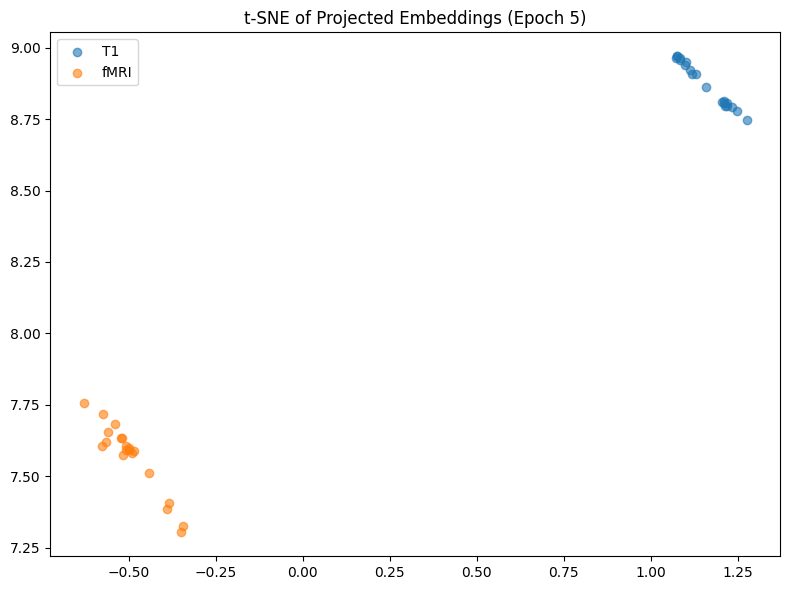

Traceback (most recent call last):
  File "/usr/lib/python3.11/multiprocessing/queues.py", line 239, in _feed
    reader_close()
  File "/usr/lib/python3.11/multiprocessing/connection.py", line 178, in close
    self._close()
  File "/usr/lib/python3.11/multiprocessing/connection.py", line 377, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor


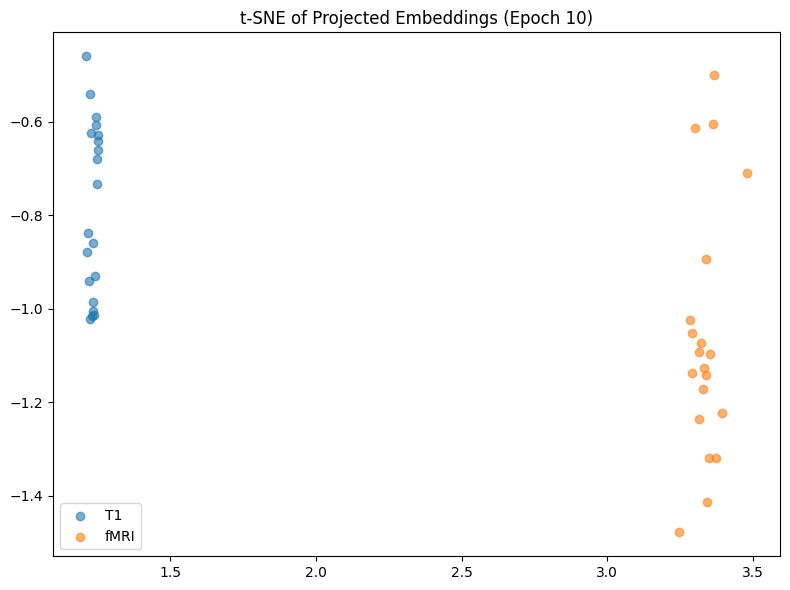

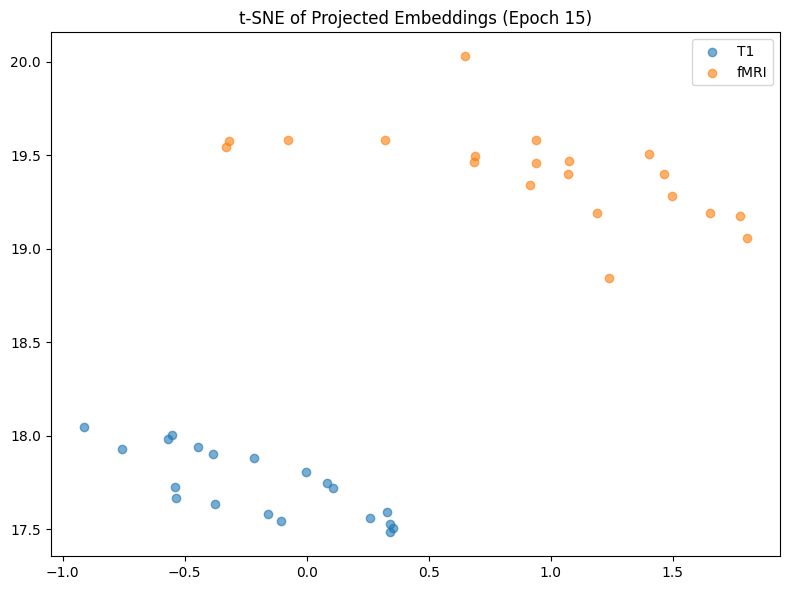

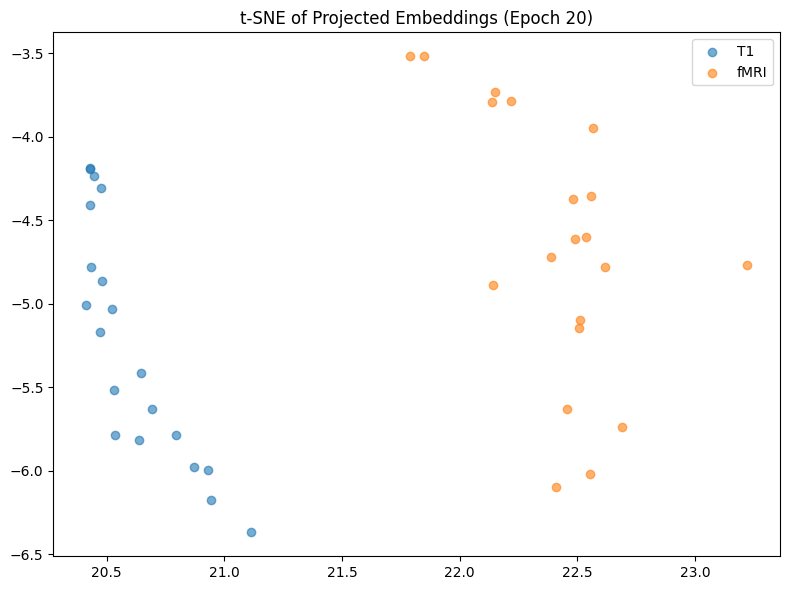

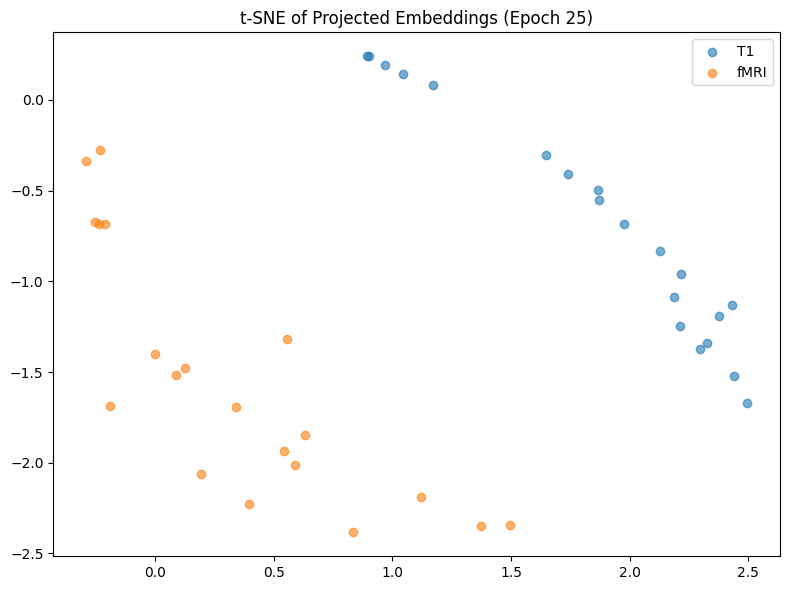

In [59]:
import torch
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def extract_projected_embeddings(model, loader, device):
    model.eval()
    all_proj_embs = []
    all_labels = []

    with torch.no_grad():
        for t1_vol, fmri_ts in loader:
            t1_vol = t1_vol.to(device)
            fmri_ts = fmri_ts.to(device)

            z1 = model.t1(t1_vol)
            z2 = model.fmri(fmri_ts)

            h1 = F.normalize(model.proj_t1(z1), dim=1)
            h2 = F.normalize(model.proj_fmri(z2), dim=1)

            all_proj_embs.append(torch.cat([h1, h2], dim=0).cpu().numpy())
            all_labels.extend(['T1'] * h1.size(0) + ['fMRI'] * h2.size(0))

    return np.concatenate(all_proj_embs), np.array(all_labels)

def plot_tsne(embeddings, labels, title, epoch):
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)
    tsne_out = tsne.fit_transform(embeddings)

    plt.figure(figsize=(8, 6))
    for label in np.unique(labels):
        idx = labels == label
        plt.scatter(tsne_out[idx, 0], tsne_out[idx, 1], label=label, alpha=0.6)
    plt.title(f"{title} (Epoch {epoch})")
    plt.legend()
    plt.tight_layout()
    plt.show()

def evaluate_tsne_from_checkpoint(checkpoint_path, model_class, device, loader, epoch):
    model = model_class().to(device)
    checkpoint = torch.load(checkpoint_path, map_location=device, weights_only=False)
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()
    embs, labels = extract_projected_embeddings(model, loader, device)
    plot_tsne(embs, labels, title="t-SNE of Projected Embeddings", epoch=epoch)

def get_model_fn():
    t1_encoder = ViT3D()
    fmri_encoder = TimeSeriesTransformer()
    model = ContrastiveAlignmentModel(t1_encoder, fmri_encoder, latent_dim=512, temperature=0.1)
    return model

for epoch in [5, 10, 15, 20, 25]:
    ckpt = f"checkpoint_epoch_{epoch}.pt"
    evaluate_tsne_from_checkpoint(ckpt, get_model_fn, device, loader, epoch)